In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425350 sha256=fd5a143f9468f5e22961288b207a75b0c26ec49249a415f0d99ce20e343416be
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# đọc dữ liệu từ file csv
path = '/kaggle/input/ngochan01/products-interested-fb.csv'
dataframe = pd.read_csv(path , encoding='latin-1')
dataframe.head(1000)

,ID,Date,Time,Page Name,AVR_Age,product_name,Category,Reaction,Comments,Share,Location,Review Rating
0,1,01/05/2022,10:15:00 PM,Bonolota,23,Shorts,Clothing,415,66,7.0,Maryland,3.3
1,2,01/06/2022,10:14:00 PM,Mystique Glint,67,Blouse,Clothing,388,65,49.0,Wisconsin,4.8
2,3,01/06/2022,9:37:00 PM,Face of Korea,23,Coat,Outerwear,689,436,428.0,Idaho,4.1
3,4,01/07/2022,4:58:00 PM,Khan Brothers,26,Sunglasses,Accessories,948,71,58.0,Wyoming,3.4
4,5,01/09/2022,11:03:00 PM,Carnesia,52,Shorts,Clothing,6000,2000,106.0,Indiana,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,12/30/2022,11:23:00 PM,Blue Dot Shopping,47,Shorts,Clothing,569,30,10.0,Kansas,2.9
996,997,12/30/2022,2:17:00 PM,Shaheba Fashion's Two,31,Skirt,Clothing,414,126,22.0,New York,5.0
997,998,12/31/2022,10:56:00 PM,RP Shopping Zone,68,Skirt,Clothing,735,54,13.0,Minnesota,4.4
998,999,12/31/2022,10:24:00 PM,Cloth Zone By Prema,51,Jeans,Clothing,637,40,18.0,Ohio,3.5


In [20]:
# Kiểm tra dữ liệu của cột Date
print(dataframe['Reaction'].dtype)

int64


In [ ]:
#Câu1: Loại sản phẩm nào được khách hàng quan tâm Reaction nhiều nhất trong năm? 

In [21]:
#tính tổng reaction của các loại sản phẩm
dataframe.groupby('Category').sum()['Reaction']

Category
Accessories     680768
Clothing       1241331
Footwear        534123
Outerwear       233930
Name: Reaction, dtype: int64

In [22]:
#số reaction cao nhất của một loại sản phẩm 
reaction_max = dataframe.groupby('Category').sum()['Reaction']
reaction_max.max()

1241331

In [25]:
#lấy tất cả các dữ liệu của bảng loại sản phẩm gắn vào 1 biến bất kì 
baocao = dataframe['Category'].unique()

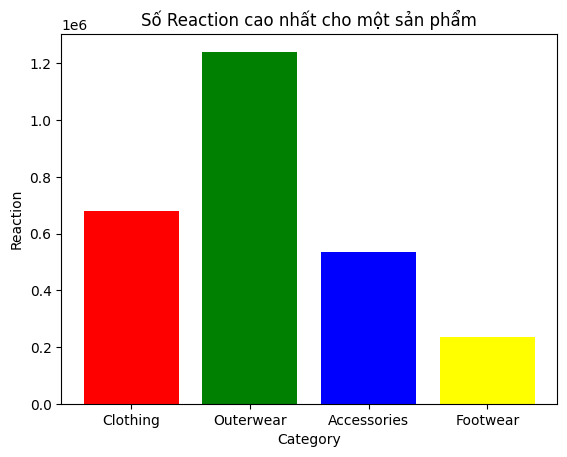

In [31]:
plt.bar(x=baocao, height=reaction_max, color=['red', 'green', 'blue', 'yellow', 'purple']) 
plt.xticks(baocao, rotation = 0) #tên các loại sản phẩm dưới cột và điều chỉnh chữ nghiêng
plt.xlabel('Category') # tên hàng ngang 
plt.ylabel('Reaction') # tên hàng dọc 
plt.title('Số Reaction cao nhất cho một sản phẩm')
plt.show()

In [ ]:
#Số lượng của các loại sản phẩm theo tên là bao nhiêu

In [32]:
#Đếm số lượng sản phẩm của các loại tên sản phẩm 
dataframe.groupby('Category').count()['product_name']

Category
Accessories    392
Clothing       556
Footwear       199
Outerwear      101
Name: product_name, dtype: int64

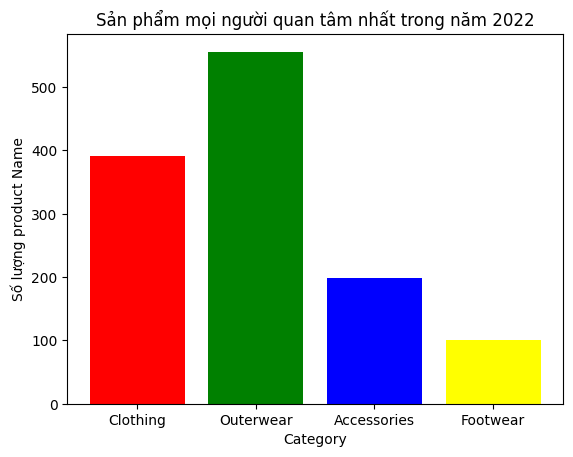

In [36]:
#Gán giá trị của số lượng của 1 loại sản phẩm vào 1 biến bất kì 
sp = dataframe.groupby('Category').count()['product_name']
#gán tất cả các loại sản phẩm vào 1 biến bất kì 
namesp = dataframe['Category'].unique()

plt.bar(x = namesp, height = sp, color=['red', 'green', 'blue', 'yellow', 'purple'])
plt.xticks(namesp, rotation = 0)
plt.xlabel('Category')
plt.ylabel('Số lượng product Name')
plt.title('Sản phẩm mọi người quan tâm nhất trong năm 2022')
plt.show()

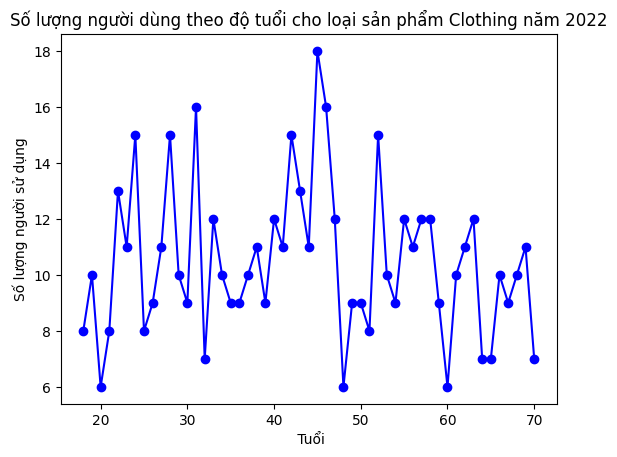

In [43]:
Clothing_pro = dataframe[dataframe['Category'] == 'Clothing']
AgeCount = Clothing_pro['AVR_Age'].value_counts()
AgeCount = Clothing_pro['AVR_Age'].value_counts().sort_index()

# Vẽ biểu đồ đường
AgeCount.plot.line(marker='o', linestyle='-', color='blue')

plt.title('Số lượng người dùng theo độ tuổi cho loại sản phẩm Clothing năm 2022')
plt.xlabel(' Tuổi')
plt.ylabel('Số lượng người sử dụng')
plt.show()

In [38]:
#hiển thị số tuổi của bảng AVR_AGE
print(set(dataframe['AVR_Age']))

{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70}


In [ ]:
#Tính tổng tỷ lệ của từng độ tuổi quan tâm đến Facebook Product Category

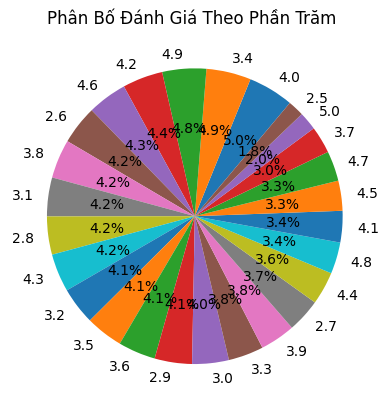

In [53]:
Age_sort = dataframe.sort_values(by='Review Rating')
Age_ratio = Age_sort['Review Rating'].value_counts(normalize=True)

# Tạo biểu đồ pie chart tổng hợp
Age_ratio.plot.pie(autopct='%1.1f%%', startangle=50)
plt.title('Phân Bố Đánh Giá Theo Phần Trăm ')
plt.ylabel('')  
plt.show()